# ✈ Airline Load Factor Optimization (India, 2023–24)


# 1. Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set style for plots
sns.set(style="whitegrid")

# 2. DATA: Airline-level metrics

In [13]:
data = {
    "Airline": ["INDIGO", "AIR INDIA", "VISTARA", "AIX CONNECT", "AKASA AIR", "SPICEJET", "AIR INDIA EXPRESS", "ALLIANCE AIR", "GO AIR", "STAR AIR", "INDIA ONE AIR"],
    "Load Factor (%)": [86.8, 86.8, 91.8, 86.6, 89.4, 92.3, 81.4, 74.1, 91.2, 75.3, 83.5],
    "ASK (Mn KM)": [102612, 17673, 16849, 12202, 7522, 8625, 1531, 885, 917, 365, 8],
    "Avg Ticket Price (₹)": [3500, 5500, 6000, 4200, 3300, 3200, 4000, 2800, 3000, 2500, 1800]
}

# Create DataFrame
df = pd.DataFrame(data)

# 3. Calculate RPK, Unsold Seat-KM, Seats, Revenue Loss

In [14]:
df["RPK (Mn KM)"] = df["ASK (Mn KM)"] * (df["Load Factor (%)"] / 100)
df["Unsold Seat KM (Mn)"] = df["ASK (Mn KM)"] - df["RPK (Mn KM)"]
df["Unsold Seats (Lakh)"] = df["Unsold Seat KM (Mn)"] * 1e6 / 800 / 1e5
df["Revenue Loss (₹ Cr)"] = df["Unsold Seats (Lakh)"] * 1e5 * df["Avg Ticket Price (₹)"] / 1e7

# Show the final table
print(df)


              Airline  Load Factor (%)  ASK (Mn KM)  Avg Ticket Price (₹)  \
0              INDIGO             86.8       102612                  3500   
1           AIR INDIA             86.8        17673                  5500   
2             VISTARA             91.8        16849                  6000   
3         AIX CONNECT             86.6        12202                  4200   
4           AKASA AIR             89.4         7522                  3300   
5            SPICEJET             92.3         8625                  3200   
6   AIR INDIA EXPRESS             81.4         1531                  4000   
7        ALLIANCE AIR             74.1          885                  2800   
8              GO AIR             91.2          917                  3000   
9            STAR AIR             75.3          365                  2500   
10      INDIA ONE AIR             83.5            8                  1800   

    RPK (Mn KM)  Unsold Seat KM (Mn)  Unsold Seats (Lakh)  Revenue Loss (₹ 

# 4. PIE CHART - Top 5 loss makers

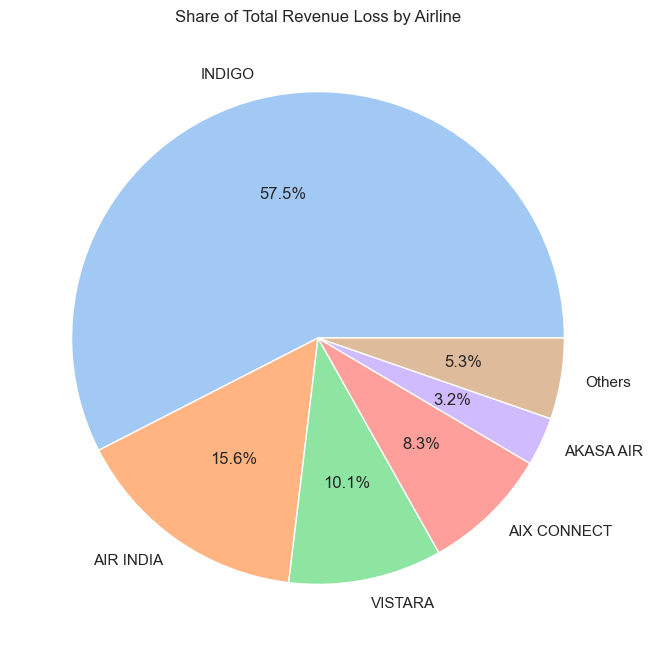

In [15]:
top5 = df.sort_values("Revenue Loss (₹ Cr)", ascending=False).head(5)
others_loss = df["Revenue Loss (₹ Cr)"].sum() - top5["Revenue Loss (₹ Cr)"].sum()

plt.figure(figsize=(8, 8))
plt.pie(
    top5["Revenue Loss (₹ Cr)"].tolist() + [others_loss],
    labels=top5["Airline"].tolist() + ["Others"],
    autopct="%1.1f%%",
    colors=sns.color_palette("pastel")
)
plt.title("Share of Total Revenue Loss by Airline")
plt.show()

# 5. Load Factor Improvement Simulation

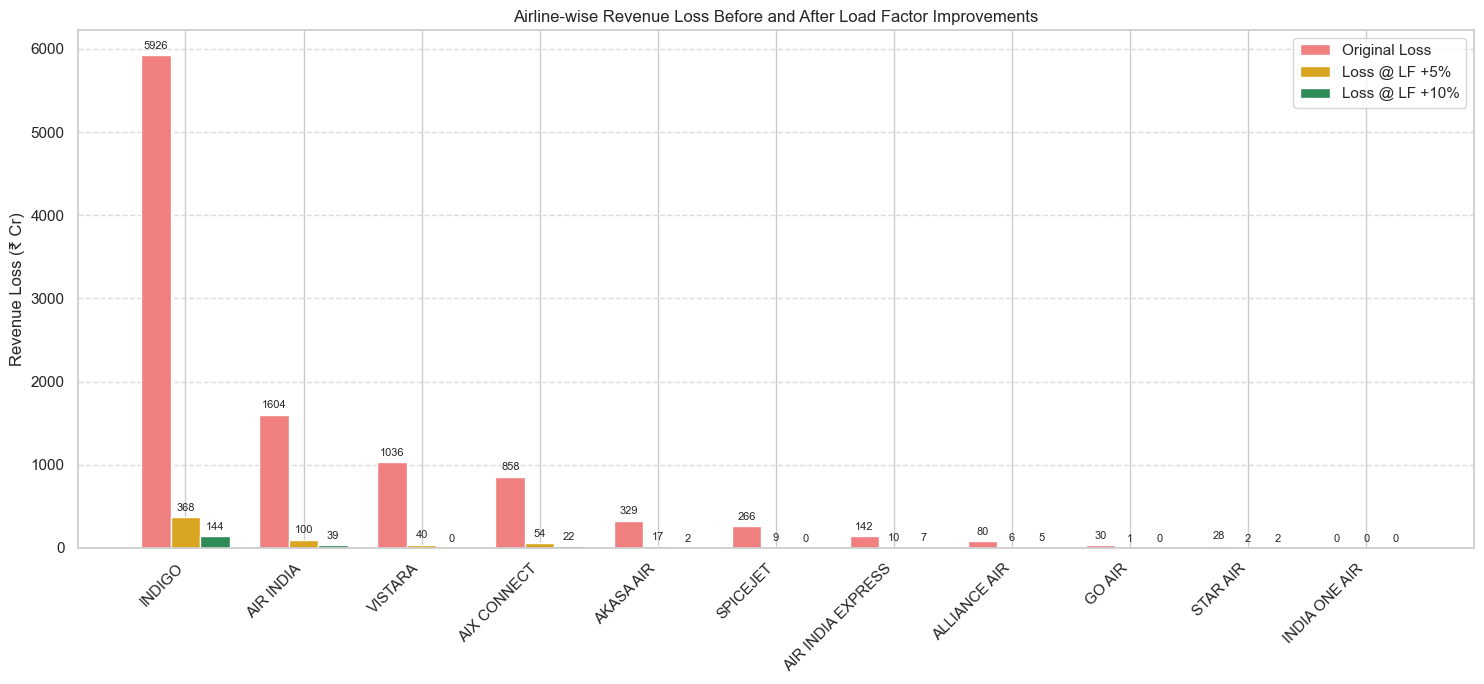

In [16]:
# Data from previous simulation
airlines = ["INDIGO", "AIR INDIA", "VISTARA", "AIX CONNECT", "AKASA AIR",
            "SPICEJET", "AIR INDIA EXPRESS", "ALLIANCE AIR", "GO AIR", 
            "STAR AIR", "INDIA ONE AIR"]

loss_before = [5925.84, 1603.83, 1036.22, 858.41, 328.90, 265.65, 
               142.39, 80.23, 30.26, 28.17, 0.30]

loss_after_5 = [368.12, 99.63, 40.44, 53.81, 17.38, 9.32, 
                10.41, 6.47, 1.31, 2.25, 0.02]

loss_after_10 = [143.66, 38.88, 0.00, 21.78, 1.86, 0.00, 
                 6.58, 4.93, 0.00, 1.68, 0.01]

x = np.arange(len(airlines))
width = 0.25

# Plotting grouped bar chart
plt.figure(figsize=(15, 7))
bars1 = plt.bar(x - width, loss_before, width, label='Original Loss', color='lightcoral')
bars2 = plt.bar(x, loss_after_5, width, label='Loss @ LF +5%', color='goldenrod')
bars3 = plt.bar(x + width, loss_after_10, width, label='Loss @ LF +10%', color='seagreen')

plt.ylabel("Revenue Loss (₹ Cr)")
plt.title("Airline-wise Revenue Loss Before and After Load Factor Improvements")
plt.xticks(x, airlines, rotation=45, ha='right')
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Optional: Add value labels
for bar_group in [bars1, bars2, bars3]:
    for bar in bar_group:
        height = bar.get_height()
        plt.annotate(f'{height:.0f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()



# 6. Route Optimisation (10% ASK CUT)

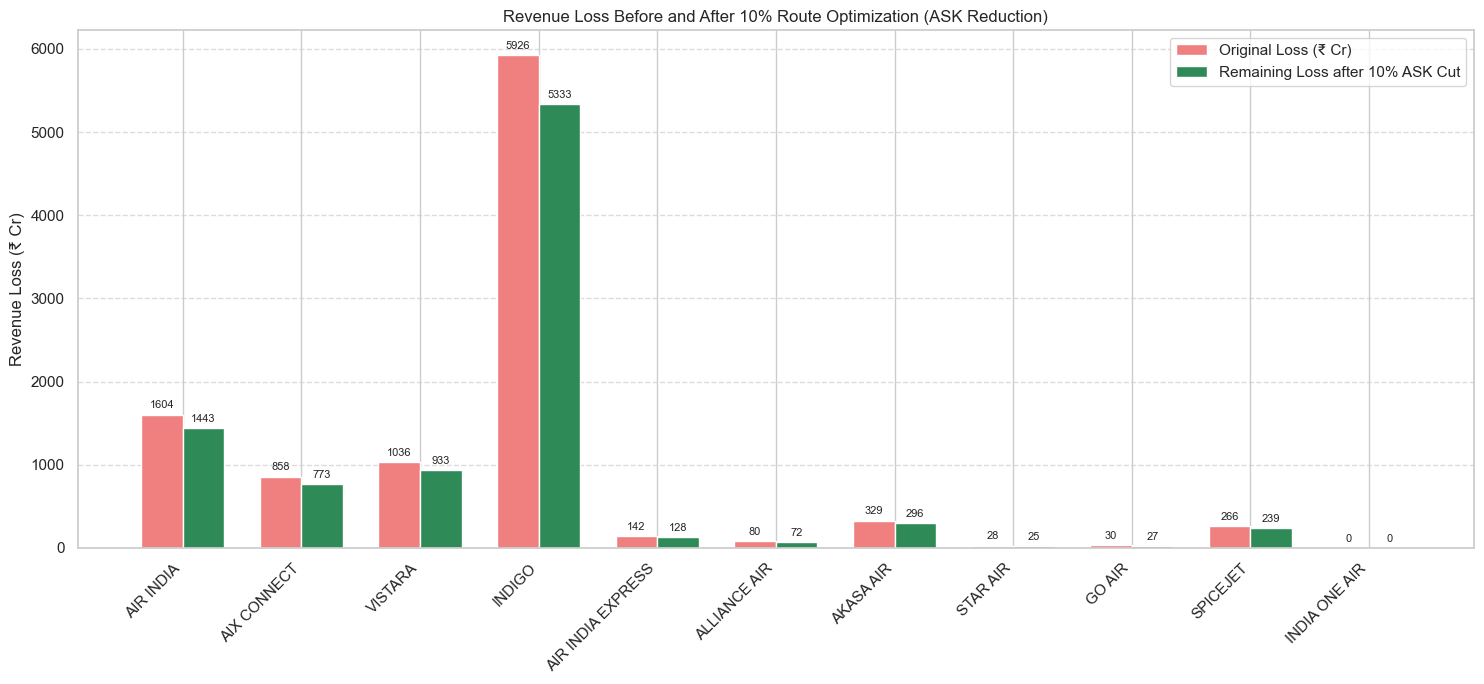

In [19]:
# Data for Route Optimization: 10% ASK cut recovery
airlines = ["AIR INDIA", "AIX CONNECT", "VISTARA", "INDIGO", "AIR INDIA EXPRESS",
            "ALLIANCE AIR", "AKASA AIR", "STAR AIR", "GO AIR", 
            "SPICEJET", "INDIA ONE AIR"]

original_loss = [1603.83, 858.41, 1036.22, 5925.84, 142.39,
                 80.23, 328.90, 28.17, 30.26, 265.65, 0.30]

recovery_route_optim = [160.38, 85.84, 103.62, 592.58, 14.24,
                        8.02, 32.89, 2.82, 3.03, 26.56, 0.03]

remaining_loss_after_optim = [o - r for o, r in zip(original_loss, recovery_route_optim)]

x = np.arange(len(airlines))
width = 0.35

# Plot bar chart
plt.figure(figsize=(15, 7))
bars1 = plt.bar(x - width/2, original_loss, width, label='Original Loss (₹ Cr)', color='lightcoral')
bars2 = plt.bar(x + width/2, remaining_loss_after_optim, width, label='Remaining Loss after 10% ASK Cut', color='seagreen')

# Chart settings
plt.ylabel("Revenue Loss (₹ Cr)")
plt.title("Revenue Loss Before and After 10% Route Optimization (ASK Reduction)")
plt.xticks(x, airlines, rotation=45, ha='right')
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add labels
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.annotate(f'{height:.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


# 7. Top Strategies To Increase Seat Occupancy

 1. **Dynamic Pricing & Flash Sales**  
    Adjust ticket prices based on demand, day/time, booking window  
    Run limited-time discounts to fill under-booked flights  
    👉 *Use Case:* IndiGo can reduce prices 10 days before flight if occupancy < 70%  
    🧠 *Impact:* Fills seats that might otherwise go empty with price-sensitive travelers.
 
 2. **Route Optimization / Frequency Adjustment**  
    Reduce flights on low-demand routes (e.g., 4 flights → 2 flights/day)  
    Combine low-demand routes with high-demand hubs  
    🧠 *Impact:* Reduces ASK, improves load factor with fewer but fuller flights
 
 3. **Targeted Promotions**  
    Offer discounts only on low-occupancy sectors (not across board)  
    Geo-targeted ads (e.g., Bengaluru–Lucknow route underperforming → only target that city pair)  
    🧠 *Impact:* Localized marketing improves seat fill on specific routes
 
 4. **Loyalty Programs & Frequent Flyer Incentives**  
    Reward users for flying more (even on lean routes)  
    Bonus points/miles for flights with poor occupancy  
    🧠 *Impact:* Encourages people to book lower-demand flights voluntarily
 
 5. **Bundled Packages (with Hotels, Taxis, Meals)**  
    Make flying more attractive to low-budget travelers  
    Partner with travel platforms (e.g., MakeMyTrip, Yatra)  
    🧠 *Impact:* Taps into new customer segments and increases conversion
 
 6. **Re-route Aircraft to Higher Demand Flights**  
    If flight A (Delhi–Raipur) has 50% LF and flight B (Delhi–Mumbai) is full, shift aircraft to B  
    🧠 *Impact:* Utilizes fleet efficiently based on actual demand, not fixed schedules
 """

# 7. CONCLUSION

Airlines can recover ₹9,000+ Cr through better seat occupancy and ₹1,000+ Cr through network optimization.
Visualization, simulation, and strategic recommendations can help reduce inefficiencies.